In [1]:
import pandas as pd
import numpy as np

In [3]:
# Load dataset
data_path = "./data/predicted_soltox.csv"
df = pd.read_csv(data_path)
df.head()

,smiles,solubility,toxicity
0,[BH3-]C#N.c1cc[n+](C2CC2)cc1,46.497936,3.578235
1,[BH3-]F.[Na+],20.050950,6.317183
2,[Br-].c1cc[n+](C2CC2)cc1,43.323656,3.655153
3,[Br-].c1cc[n+](OCC2CCCOC2)cc1,49.249285,2.576022
4,[Br-].c1cc[nH+]cc1,32.908788,4.866436


# Rank the ILs using TOPSIS method

In [4]:
# Standardize the criteria
df['solubility_norm'] = (df['solubility'] - df['solubility'].mean()) / df['solubility'].std()
df['toxicity_norm'] = (df['toxicity'] - df['toxicity'].mean()) / df['toxicity'].std()

# Calculate the weighted normalized decision matrix (equal weightage here)
weights = np.array([0.55, 0.45])
df['weighted_solubility'] = df['solubility_norm'] * weights[0]
df['weighted_toxicity'] = df['toxicity_norm'] * weights[1]

# Determine the ideal and negative-ideal solutions
ideal_solution = [df['weighted_solubility'].max(), df['weighted_toxicity'].max()]
negative_ideal_solution = [df['weighted_solubility'].min(), df['weighted_toxicity'].min()]

# Calculate the distance from the ideal and negative-ideal solutions
df['distance_to_ideal'] = np.sqrt((df['weighted_solubility'] - ideal_solution[0])**2 + (df['weighted_toxicity'] - ideal_solution[1])**2)
df['distance_to_negative_ideal'] = np.sqrt((df['weighted_solubility'] - negative_ideal_solution[0])**2 + (df['weighted_toxicity'] - negative_ideal_solution[1])**2)

# Calculate the relative closeness to the ideal solution
df['relative_closeness'] = df['distance_to_negative_ideal'] / (df['distance_to_ideal'] + df['distance_to_negative_ideal'])

# Rank the alternatives
df['rank'] = df['relative_closeness'].rank(ascending=False)

# Sort by rank
df_sorted = df.sort_values('rank')
df_sorted.head(10)

# Save the file
df_sorted.to_csv("./data/sorted_mols.csv", index=False)

# Visualization of the selected ILs

In [5]:
# define the dataset
middle_start = len(df_sorted) // 2 - 5

df_top = df_sorted[:10]
df_middle = df_sorted.iloc[middle_start:middle_start + 10]
df_bottom = df_sorted[-10:]

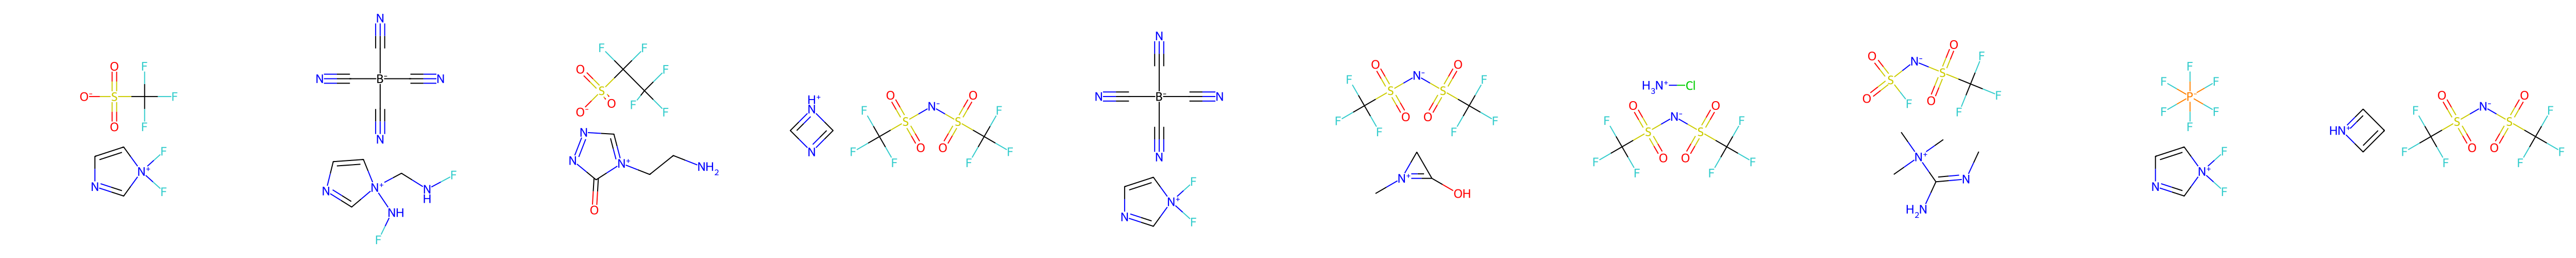

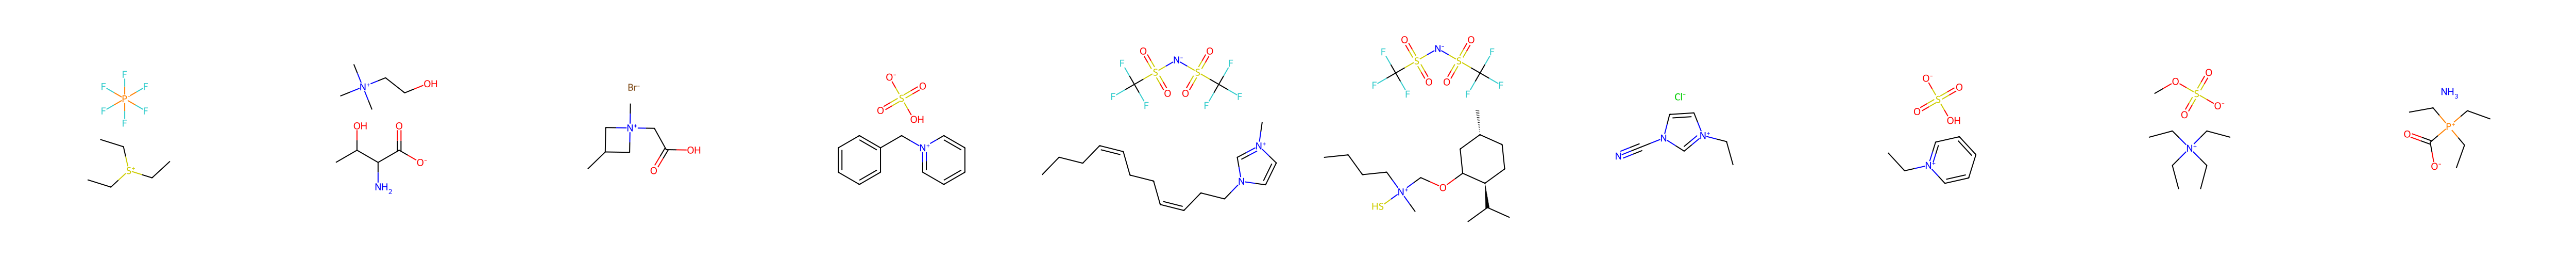

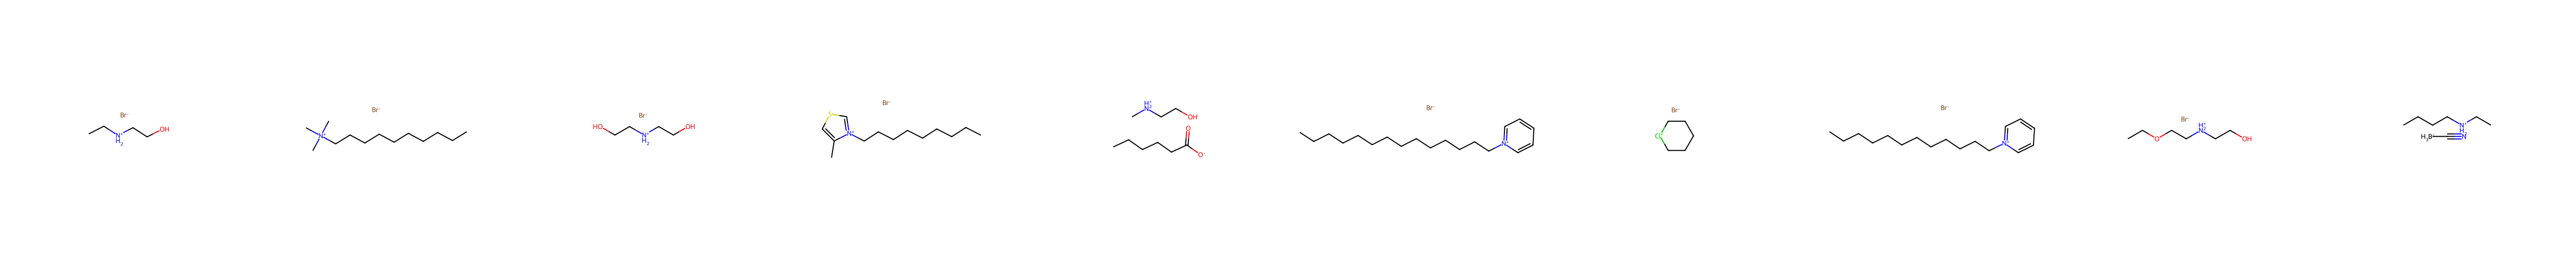

In [6]:
# Visualize the best and worst ILs

from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Create RDKit molecule objects
smiles_top = df_top['smiles']
smiles_middle = df_middle['smiles']
smiles_bottom = df_bottom['smiles']
mol_top = [Chem.MolFromSmiles(smiles) for smiles in smiles_top]
mol_middle = [Chem.MolFromSmiles(smiles) for smiles in smiles_middle]
mol_bottom = [Chem.MolFromSmiles(smiles) for smiles in smiles_bottom]

# Draw the molecules
img1 = Draw.MolsToGridImage(mol_top, molsPerRow=10, subImgSize=(500,500))
img2 = Draw.MolsToGridImage(mol_middle, molsPerRow=10, subImgSize=(500,500))
img3 = Draw.MolsToGridImage(mol_bottom, molsPerRow=10, subImgSize=(500,500))
display(img1, img2, img3)